In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 100)


In [27]:
ds_path = r".\data\GermanyUsedCars.zip"
dfo = pd.read_csv(ds_path, index_col=0, dtype_backend='pyarrow')
dfo.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

### Data exploration

In [28]:
# dfo.shape
# dfo.isnull().count()
# dfo.isna().sum()
# dfo.isnull().sum()
# dfo.fuel_type.value_counts()
# dfo.color.value_counts()
# dfo.color.isna().sum()
# df.dtypes
# dfo.mileage_in_km.value_counts()
# dfo.mileage_in_km.isna().sum()
# dfo.dtypes




brand                       string[pyarrow]
model                       string[pyarrow]
color                       string[pyarrow]
registration_date           string[pyarrow]
year                        string[pyarrow]
price_in_euro               string[pyarrow]
power_kw                    string[pyarrow]
power_ps                    string[pyarrow]
transmission_type           string[pyarrow]
fuel_type                   string[pyarrow]
fuel_consumption_l_100km    string[pyarrow]
fuel_consumption_g_km       string[pyarrow]
mileage_in_km               double[pyarrow]
offer_description           string[pyarrow]
dtype: object

### Data Cleansing

In [86]:
# drop non-numeric year values
df = dfo.copy()
df.year = pd.to_numeric(df.year, errors='coerce').dropna(axis=0)
df = df.loc[~((df.year.isna()) | (df.year > 2023))]
        # assign(years_in_service = lambda x: 2023-x.year)
# # drop non-numeric price_in_euro values
# df = df.assign(price_in_euro = pd.to_numeric(df.price_in_euro, errors='coerce'))
# df.year = df.year.fillna(0)
        
"number_of_droped_col:", dfo.shape[0]- df.shape[0]

('number_of_droped_col:', 4)

In [87]:
# df.year.value_counts() - 
df.year.value_counts()

year
2019.0    29225
2018.0    24095
2023.0    21097
2022.0    20653
2017.0    18940
2020.0    18566
2021.0    16022
2016.0    15072
2015.0    12712
2014.0    10623
2013.0     9325
2012.0     7992
2011.0     7384
2009.0     6431
2010.0     6043
2008.0     4847
2007.0     4018
2006.0     3973
2005.0     3399
2004.0     2649
2003.0     2101
2002.0     1581
2001.0     1216
2000.0      963
1999.0      744
1998.0      469
1997.0      343
1996.0      227
NaN         195
1995.0      170
Name: count, dtype: int64[pyarrow]

In [ ]:
def check_non_numeric(s:pd.Series):
    
    idx = pd.to_numeric(s, errors='coerce').isna()
    return idx  # return index of non numeric


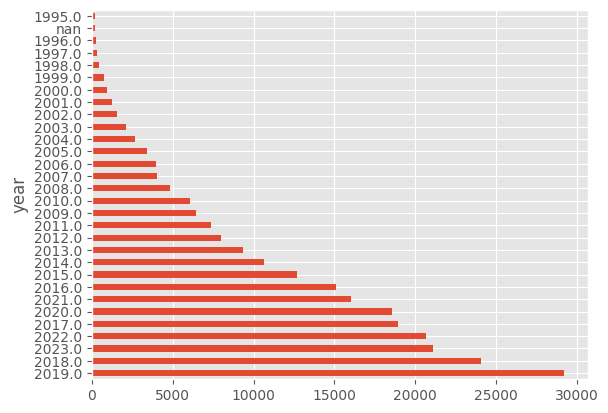

In [59]:
# df['year_inroduced'].value_counts().head().plot(kind='bar'| 'barh' | 'hist' , title=, xlabel=)
df['year'].value_counts().plot(kind='barh')
plt.show()

### Working 

In [56]:
# dfo.head()
# dfo.brand.value_counts()
# dfo[['year', 'registration_date']].head()
# df = dfo.assign(year_e = pd.to_numeric(dfo.year, errors='coerce'))
# df = dfo.assign(years_in_service = 2023-pd.to_numeric(dfo.year, errors='coerce'))
# dfo.year.astype(int, errors='ignore') - 2023
df[['brand', 'year', 'price_in_euro']].groupby(['brand', 'year']).mean()
# 2023 - dfo.year.astype(int, errors='ignore')
# df.head()
# df.years_on_service
# df.years_in_service = 2023 - df.years_in_service
# df = df.loc[df.years_in_service >= 0]
# df[['year', 'year_e']].value_counts()
# df[['year']].value_counts()


price_in_euro
brand      year                 
alfa-romeo 1995.0         9250.0
           1996.0         7456.0
           1997.0   13426.235294
           1998.0    5019.714286
           1999.0      5475.9375
...                          ...
volvo      2020.0   41352.417832
           2021.0   47843.649616
           2022.0   53252.604278
           2023.0    60842.70229
           NaN              <NA>

[989 rows x 1 columns]

In [ ]:
# pd.to_numeric(dfo.year, errors='coerce').value_counts()
pd.to_numeric(df.price_in_euro, errors='raise').value_counts().sort_index()
